In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import warnings
from custom import custom_funcs as cf
from datetime import datetime

warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_excel("Final.xlsx")
df.head()

,id,length,nviews,rating,nratings,ncomments,n2views,rating2,n2ratings,n2comments,n3views,rating3,n3ratings,n3comments,n4views,rating4,n4ratings,n4comments
0,unBXluuefRU,113,12030,4.96,52,6,101091,4.64,226,70,132499,4.65,244,69,146381,4.65,261,68
1,3HsmNxciJYw,21,9530,4.85,514,0,66059,4.24,630,43,69150,4.17,644,47,72323,4.15,648,46
2,EhwRecP_wB0,215,1734,4.83,216,134,5640,4.74,305,169,7124,4.76,346,188,8348,4.76,361,188
3,LThmT86KN2c,268,944,4.61,212,152,6705,4.62,578,381,9009,4.62,695,450,10058,4.63,729,453
4,Ntf90dyYDtM,309,1038,4.87,162,0,5766,4.69,174,0,6388,4.69,176,0,8558,4.66,207,0


In [4]:
dfniviews = df.copy()
dfn2views = df.copy()
dfn3views = df.copy()
dfn4views = df.copy()

In [5]:
dfniviews = dfniviews.sort_values('nviews', ascending=False)
dfniviews.head(10)

,id,length,nviews,rating,nratings,ncomments,n2views,rating2,n2ratings,n2comments,n3views,rating3,n3ratings,n3comments,n4views,rating4,n4ratings,n4comments
0,unBXluuefRU,113,12030,4.96,52,6,101091,4.64,226,70,132499,4.65,244,69,146381,4.65,261,68
1,3HsmNxciJYw,21,9530,4.85,514,0,66059,4.24,630,43,69150,4.17,644,47,72323,4.15,648,46
229,OeRl4YAg59I,55,8059,4.65,17,9,33942,4.60,42,25,36939,4.51,43,31,38987,4.51,43,34
14,WgDUNn8q4qo,474,5289,4.50,2,78,18892,4.22,18,157,23708,4.25,24,180,28376,4.28,25,206
115,c0fLwukjd_A,54,2285,5.00,7,9,4531,5.00,7,10,4951,4.50,8,18,5201,4.50,8,18
2,EhwRecP_wB0,215,1734,4.83,216,134,5640,4.74,305,169,7124,4.76,346,188,8348,4.76,361,188
114,A2j_JhkPV8k,72,1612,5.00,5,2,3898,5.00,7,5,4334,5.00,7,5,4649,4.50,8,7
218,6KcauZxpJk4,57,1535,4.20,5,12,9285,4.26,19,34,13905,4.42,24,60,15854,4.44,25,62
5,AKTNTM3-FQY,194,1455,4.69,136,105,5475,4.47,215,176,6593,4.47,251,190,7606,4.47,276,208
10,R083B_q2OVo,183,1243,3.97,92,112,5514,3.44,164,172,8406,3.42,209,211,10124,3.39,241,227


In [6]:
dfn2views = dfn2views.sort_values('n2views', ascending=False)
dfn2views.head(10)

,id,length,nviews,rating,nratings,ncomments,n2views,rating2,n2ratings,n2comments,n3views,rating3,n3ratings,n3comments,n4views,rating4,n4ratings,n4comments
0,unBXluuefRU,113,12030,4.96,52,6,101091,4.64,226,70,132499,4.65,244,69,146381,4.65,261,68
1,3HsmNxciJYw,21,9530,4.85,514,0,66059,4.24,630,43,69150,4.17,644,47,72323,4.15,648,46
229,OeRl4YAg59I,55,8059,4.65,17,9,33942,4.60,42,25,36939,4.51,43,31,38987,4.51,43,34
206,TV1JCEwrF6E,138,58,0.00,0,0,25959,3.00,9,2,198,5.00,1,0,18607,3.44,16,27
197,OnWCxBrTBJE,176,14,0.00,0,0,25959,3.00,9,2,198,5.00,1,0,18607,3.44,16,27
112,Eb9bCR0C9UM,179,402,3.80,5,2,25959,3.00,9,2,198,5.00,1,0,18607,3.44,16,27
15,Vwc3_9zfXi4,16,348,4.49,49,56,25134,4.07,565,396,48653,3.98,716,457,76007,3.96,848,509
21,d3rdTZUdxXI,77,936,3.43,23,55,21444,3.44,244,542,33487,3.48,315,851,35963,3.49,332,907
14,WgDUNn8q4qo,474,5289,4.50,2,78,18892,4.22,18,157,23708,4.25,24,180,28376,4.28,25,206
268,onrWx8IvfzY,223,864,3.00,4,3,11649,3.82,45,38,56318,4.03,123,133,88793,4.10,189,224


In [7]:
dfn3views = dfn3views.sort_values('n3views', ascending=False)
dfn3views.head(10)

,id,length,nviews,rating,nratings,ncomments,n2views,rating2,n2ratings,n2comments,n3views,rating3,n3ratings,n3comments,n4views,rating4,n4ratings,n4comments
0,unBXluuefRU,113,12030,4.96,52,6,101091,4.64,226,70,132499,4.65,244,69,146381,4.65,261,68
1,3HsmNxciJYw,21,9530,4.85,514,0,66059,4.24,630,43,69150,4.17,644,47,72323,4.15,648,46
268,onrWx8IvfzY,223,864,3.00,4,3,11649,3.82,45,38,56318,4.03,123,133,88793,4.10,189,224
15,Vwc3_9zfXi4,16,348,4.49,49,56,25134,4.07,565,396,48653,3.98,716,457,76007,3.96,848,509
229,OeRl4YAg59I,55,8059,4.65,17,9,33942,4.60,42,25,36939,4.51,43,31,38987,4.51,43,34
21,d3rdTZUdxXI,77,936,3.43,23,55,21444,3.44,244,542,33487,3.48,315,851,35963,3.49,332,907
14,WgDUNn8q4qo,474,5289,4.50,2,78,18892,4.22,18,157,23708,4.25,24,180,28376,4.28,25,206
45,V31LZllgwBA,202,574,4.56,9,4,4806,4.00,37,28,18240,4.30,64,63,38943,4.29,97,88
36,cLWWJtqLtes,96,782,4.50,4,0,9205,4.67,6,3,15782,4.67,6,3,18854,4.67,6,3
125,aL1J6Js8tTQ,63,1,0.00,0,0,3151,3.67,3,16,14250,3.76,17,55,21556,3.74,27,70


In [8]:
dfn4views = dfn4views.sort_values('n4views', ascending=False)
dfn4views.head(10)

,id,length,nviews,rating,nratings,ncomments,n2views,rating2,n2ratings,n2comments,n3views,rating3,n3ratings,n3comments,n4views,rating4,n4ratings,n4comments
0,unBXluuefRU,113,12030,4.96,52,6,101091,4.64,226,70,132499,4.65,244,69,146381,4.65,261,68
268,onrWx8IvfzY,223,864,3.00,4,3,11649,3.82,45,38,56318,4.03,123,133,88793,4.10,189,224
15,Vwc3_9zfXi4,16,348,4.49,49,56,25134,4.07,565,396,48653,3.98,716,457,76007,3.96,848,509
1,3HsmNxciJYw,21,9530,4.85,514,0,66059,4.24,630,43,69150,4.17,644,47,72323,4.15,648,46
189,1caJKvNjIuU,1394,74,0.00,0,1,1125,5.00,8,6,8474,4.98,42,28,43182,4.85,256,91
229,OeRl4YAg59I,55,8059,4.65,17,9,33942,4.60,42,25,36939,4.51,43,31,38987,4.51,43,34
45,V31LZllgwBA,202,574,4.56,9,4,4806,4.00,37,28,18240,4.30,64,63,38943,4.29,97,88
21,d3rdTZUdxXI,77,936,3.43,23,55,21444,3.44,244,542,33487,3.48,315,851,35963,3.49,332,907
47,YCU-qgR_4bM,321,70,0.00,0,0,914,5.00,8,3,3907,5.00,20,10,35131,4.94,114,84
244,T_Z26eVhB8Q,135,219,5.00,1,0,1490,3.67,3,0,9505,4.82,22,1,29556,4.85,34,1


In [9]:
vidsdfniviews = [(index,row['nviews']) for index, row in dfniviews.iterrows()]
print(vidsdfniviews)

[(0, 12030), (1, 9530), (229, 8059), (14, 5289), (115, 2285), (2, 1734), (114, 1612), (218, 1535), (5, 1455), (10, 1243), (117, 1202), (16, 1192), (103, 1164), (104, 1162), (54, 1119), (7, 1118), (9, 1113), (13, 1098), (4, 1038), (8, 984), (27, 978), (3, 944), (21, 936), (111, 929), (268, 864), (219, 862), (46, 858), (127, 845), (48, 839), (33, 826), (36, 782), (49, 726), (44, 710), (230, 669), (76, 595), (6, 585), (41, 575), (45, 574), (157, 552), (225, 525), (292, 521), (72, 492), (11, 488), (12, 484), (227, 474), (226, 442), (193, 441), (17, 426), (112, 402), (211, 392), (56, 388), (107, 361), (29, 357), (224, 354), (273, 354), (15, 348), (293, 348), (210, 325), (275, 299), (40, 297), (64, 281), (32, 281), (238, 280), (142, 265), (207, 262), (163, 247), (118, 241), (194, 239), (126, 236), (222, 233), (244, 219), (221, 216), (186, 213), (208, 213), (220, 212), (128, 212), (289, 211), (113, 209), (57, 207), (79, 206), (223, 205), (38, 197), (55, 189), (116, 189), (43, 176), (106, 173)

In [10]:
vidsdfn2views = [(index,row['n2views']) for index, row in dfn2views.iterrows()]
print(vidsdfn2views)

[(0, 101091), (1, 66059), (229, 33942), (206, 25959), (197, 25959), (112, 25959), (15, 25134), (21, 21444), (14, 18892), (268, 11649), (218, 9285), (36, 9205), (3, 6705), (43, 6112), (4, 5766), (6, 5656), (2, 5640), (10, 5514), (5, 5475), (17, 5419), (12, 5173), (33, 5078), (230, 4879), (45, 4806), (20, 4777), (16, 4746), (115, 4531), (103, 4477), (44, 4237), (104, 3983), (114, 3898), (9, 3871), (32, 3538), (27, 3311), (125, 3151), (111, 3075), (11, 3019), (41, 2899), (54, 2886), (46, 2824), (64, 2775), (211, 2710), (117, 2662), (13, 2605), (7, 2601), (223, 2478), (109, 2450), (40, 2440), (8, 2377), (30, 2300), (48, 2177), (193, 2100), (22, 2004), (118, 2004), (29, 1892), (127, 1873), (126, 1809), (23, 1675), (219, 1665), (210, 1648), (49, 1578), (157, 1549), (244, 1490), (163, 1489), (142, 1428), (224, 1362), (225, 1345), (186, 1296), (76, 1257), (24, 1204), (107, 1201), (68, 1196), (113, 1196), (236, 1168), (189, 1125), (26, 1065), (169, 1059), (227, 1050), (133, 1047), (220, 1037), 

In [11]:
vidsdfn4views = [(index,row['n4views']) for index, row in dfn4views.iterrows()]
print(vidsdfn4views)

[(0, 146381), (268, 88793), (15, 76007), (1, 72323), (189, 43182), (229, 38987), (45, 38943), (21, 35963), (47, 35131), (244, 29556), (14, 28376), (12, 25684), (186, 23522), (125, 21556), (126, 20321), (36, 18854), (206, 18607), (112, 18607), (197, 18607), (37, 16400), (218, 15854), (17, 14921), (27, 13199), (11, 12879), (54, 12315), (274, 11712), (32, 11095), (211, 11019), (6, 10674), (103, 10436), (48, 10411), (10, 10124), (3, 10058), (41, 9746), (33, 9421), (16, 9041), (8, 8806), (100, 8627), (43, 8568), (4, 8558), (2, 8348), (142, 8298), (68, 8272), (44, 8068), (5, 7606), (104, 7589), (275, 7474), (9, 7460), (230, 7064), (30, 6541), (127, 6376), (22, 6370), (97, 6254), (7, 6146), (20, 6082), (169, 6046), (49, 5981), (40, 5966), (109, 5777), (163, 5743), (137, 5707), (193, 5590), (23, 5580), (184, 5580), (157, 5261), (115, 5201), (121, 5160), (13, 4930), (99, 4774), (273, 4762), (46, 4673), (114, 4649), (210, 4619), (117, 4455), (149, 4428), (223, 4319), (95, 4285), (64, 4220), (111

In [12]:
vidsdfn3views = [(index,row['n3views']) for index, row in dfn3views.iterrows()]
print(vidsdfn3views)

[(0, 132499), (1, 69150), (268, 56318), (15, 48653), (229, 36939), (21, 33487), (14, 23708), (45, 18240), (36, 15782), (125, 14250), (218, 13905), (12, 12655), (17, 11184), (244, 9505), (33, 9284), (186, 9041), (3, 9009), (126, 8572), (189, 8474), (103, 8445), (10, 8406), (54, 8390), (32, 8318), (6, 7937), (43, 7638), (16, 7539), (2, 7124), (41, 7110), (142, 7045), (104, 6637), (44, 6606), (5, 6593), (4, 6388), (230, 6166), (20, 5833), (109, 5408), (9, 5378), (127, 4965), (115, 4951), (11, 4923), (193, 4877), (27, 4830), (22, 4802), (163, 4492), (40, 4481), (114, 4334), (46, 4215), (48, 4123), (64, 4105), (8, 4087), (7, 3978), (30, 3934), (23, 3915), (47, 3907), (111, 3803), (211, 3798), (117, 3790), (13, 3733), (223, 3693), (157, 3490), (68, 3466), (37, 3443), (210, 3364), (133, 3183), (118, 3170), (169, 3066), (49, 2908), (24, 2883), (275, 2784), (95, 2742), (107, 2646), (137, 2567), (236, 2559), (274, 2516), (155, 2510), (258, 2454), (124, 2450), (26, 2375), (29, 2255), (94, 2242), 

In [13]:
niviewslst = [b for a,b in vidsdfniviews]
print(niviewslst)

[12030, 9530, 8059, 5289, 2285, 1734, 1612, 1535, 1455, 1243, 1202, 1192, 1164, 1162, 1119, 1118, 1113, 1098, 1038, 984, 978, 944, 936, 929, 864, 862, 858, 845, 839, 826, 782, 726, 710, 669, 595, 585, 575, 574, 552, 525, 521, 492, 488, 484, 474, 442, 441, 426, 402, 392, 388, 361, 357, 354, 354, 348, 348, 325, 299, 297, 281, 281, 280, 265, 262, 247, 241, 239, 236, 233, 219, 216, 213, 213, 212, 212, 211, 209, 207, 206, 205, 197, 189, 189, 176, 173, 159, 146, 145, 137, 132, 127, 118, 116, 116, 115, 113, 111, 103, 102, 102, 94, 94, 91, 89, 86, 86, 86, 85, 84, 84, 78, 78, 77, 76, 74, 73, 73, 72, 70, 70, 67, 67, 65, 64, 64, 64, 63, 62, 62, 60, 59, 59, 58, 58, 58, 58, 55, 53, 53, 52, 51, 51, 51, 49, 48, 48, 47, 45, 45, 43, 43, 43, 42, 40, 40, 40, 40, 40, 40, 40, 40, 39, 38, 38, 37, 37, 37, 37, 34, 34, 34, 33, 33, 33, 33, 33, 32, 32, 31, 30, 30, 30, 30, 30, 29, 29, 29, 29, 28, 28, 28, 27, 27, 26, 26, 26, 26, 26, 25, 25, 25, 24, 24, 24, 24, 24, 24, 24, 23, 22, 21, 20, 20, 20, 20, 19, 19, 19, 18

In [14]:
n2viewslst = [b for a,b in vidsdfn2views]
print(n2viewslst)

[101091, 66059, 33942, 25959, 25959, 25959, 25134, 21444, 18892, 11649, 9285, 9205, 6705, 6112, 5766, 5656, 5640, 5514, 5475, 5419, 5173, 5078, 4879, 4806, 4777, 4746, 4531, 4477, 4237, 3983, 3898, 3871, 3538, 3311, 3151, 3075, 3019, 2899, 2886, 2824, 2775, 2710, 2662, 2605, 2601, 2478, 2450, 2440, 2377, 2300, 2177, 2100, 2004, 2004, 1892, 1873, 1809, 1675, 1665, 1648, 1578, 1549, 1490, 1489, 1428, 1362, 1345, 1296, 1257, 1204, 1201, 1196, 1196, 1168, 1125, 1065, 1059, 1050, 1047, 1037, 1011, 1003, 987, 916, 914, 904, 897, 896, 844, 842, 837, 809, 802, 785, 778, 772, 767, 763, 747, 742, 727, 674, 645, 634, 622, 584, 578, 563, 561, 558, 494, 485, 480, 455, 442, 434, 417, 414, 366, 362, 354, 315, 310, 304, 303, 291, 285, 260, 258, 251, 242, 241, 232, 230, 227, 224, 222, 221, 216, 215, 214, 213, 208, 204, 202, 201, 201, 198, 197, 195, 192, 191, 189, 189, 186, 185, 183, 183, 179, 178, 172, 169, 164, 160, 159, 157, 154, 154, 153, 151, 150, 149, 147, 146, 146, 144, 143, 141, 139, 139, 137, 1

In [15]:
n3viewslst = [b for a,b in vidsdfn3views]
print(n3viewslst)

[132499, 69150, 56318, 48653, 36939, 33487, 23708, 18240, 15782, 14250, 13905, 12655, 11184, 9505, 9284, 9041, 9009, 8572, 8474, 8445, 8406, 8390, 8318, 7937, 7638, 7539, 7124, 7110, 7045, 6637, 6606, 6593, 6388, 6166, 5833, 5408, 5378, 4965, 4951, 4923, 4877, 4830, 4802, 4492, 4481, 4334, 4215, 4123, 4105, 4087, 3978, 3934, 3915, 3907, 3803, 3798, 3790, 3733, 3693, 3490, 3466, 3443, 3364, 3183, 3170, 3066, 2908, 2883, 2784, 2742, 2646, 2567, 2559, 2516, 2510, 2454, 2450, 2375, 2255, 2242, 2107, 2042, 2031, 1996, 1944, 1941, 1907, 1864, 1845, 1840, 1686, 1669, 1662, 1653, 1636, 1592, 1580, 1514, 1493, 1481, 1472, 1455, 1446, 1358, 1356, 1345, 1303, 1265, 1250, 1236, 1169, 1133, 1035, 999, 964, 962, 939, 909, 905, 892, 857, 847, 812, 810, 807, 755, 731, 728, 726, 709, 692, 691, 677, 614, 599, 596, 578, 575, 570, 562, 560, 552, 526, 524, 512, 508, 506, 487, 482, 475, 471, 461, 452, 450, 447, 447, 428, 427, 414, 412, 397, 395, 388, 382, 375, 375, 374, 366, 357, 341, 340, 339, 338, 320, 31

In [16]:
n4viewslst = [b for a,b in vidsdfn4views]
print(n4viewslst)

[146381, 88793, 76007, 72323, 43182, 38987, 38943, 35963, 35131, 29556, 28376, 25684, 23522, 21556, 20321, 18854, 18607, 18607, 18607, 16400, 15854, 14921, 13199, 12879, 12315, 11712, 11095, 11019, 10674, 10436, 10411, 10124, 10058, 9746, 9421, 9041, 8806, 8627, 8568, 8558, 8348, 8298, 8272, 8068, 7606, 7589, 7474, 7460, 7064, 6541, 6376, 6370, 6254, 6146, 6082, 6046, 5981, 5966, 5777, 5743, 5707, 5590, 5580, 5580, 5261, 5201, 5160, 4930, 4774, 4762, 4673, 4649, 4619, 4455, 4428, 4319, 4285, 4220, 4198, 3788, 3772, 3768, 3706, 3705, 3703, 3651, 3636, 3532, 3530, 3443, 3325, 3289, 3199, 3168, 3115, 3008, 2974, 2919, 2889, 2588, 2584, 2573, 2565, 2504, 2484, 2464, 2425, 2417, 2413, 2408, 2374, 2284, 2282, 2281, 2227, 2183, 2167, 2158, 2135, 2116, 2029, 2022, 1984, 1915, 1876, 1858, 1825, 1752, 1750, 1739, 1725, 1653, 1614, 1533, 1504, 1488, 1452, 1421, 1421, 1387, 1377, 1319, 1301, 1279, 1230, 1229, 1203, 1199, 1183, 1175, 1165, 1165, 1137, 1136, 1128, 1121, 1112, 1063, 1059, 1052, 1050,

In [17]:
krange = list(range(len(niviewslst)))
t = np.linspace(0,1, len(krange))

In [18]:
from numpy import *
import math
import matplotlib.pyplot as plt

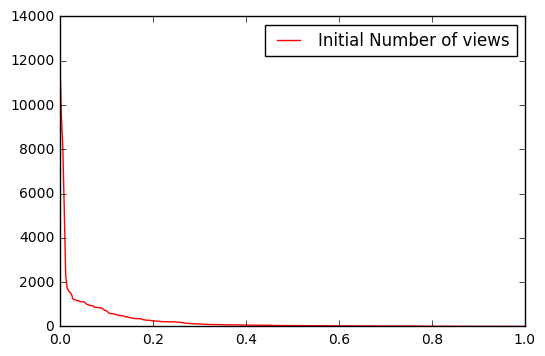

In [19]:
plt.plot(t,niviewslst,'r', label='Initial Number of views')
plt.legend(loc='upper right')
#plt.ylim(0, 500000)
plt.show()

In [20]:
niviewslstcpy = niviewslst[:]
n2viewslstcpy = n2viewslst[:]
n3viewslstcpy = n3viewslst[:]
n4viewslstcpy = n4viewslst[:]

In [21]:
sumi=0
for i in range(len(niviewslstcpy)):
    temp = niviewslstcpy[i]
    niviewslstcpy[i] = niviewslstcpy[i] + sumi
    sumi += temp

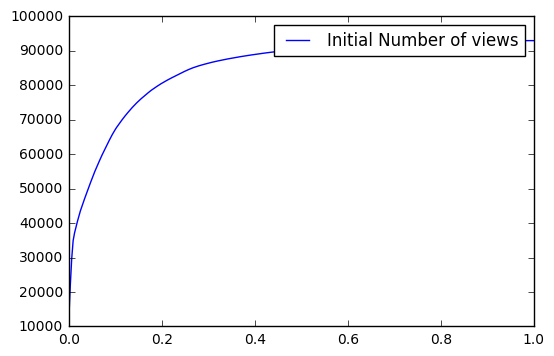

In [22]:
plt.plot(t,niviewslstcpy,'b', label='Initial Number of views')
plt.legend(loc='upper right')
#plt.ylim(0, 500000)
plt.show()

In [23]:
sum2 = 0
for i in range(len(n2viewslstcpy)):
    temp = n2viewslstcpy[i]
    n2viewslstcpy[i] = n2viewslstcpy[i] + sum2
    sum2 += temp

In [24]:
sum2 = 0
for i in range(len(n3viewslstcpy)):
    temp = n3viewslstcpy[i]
    n3viewslstcpy[i] = n3viewslstcpy[i] + sum2
    sum2 += temp

In [25]:
sum3 =0
for i in range(len(n4viewslstcpy)):
    temp = n4viewslstcpy[i]
    n4viewslstcpy[i] = n4viewslstcpy[i] + sum3
    sum3 += temp

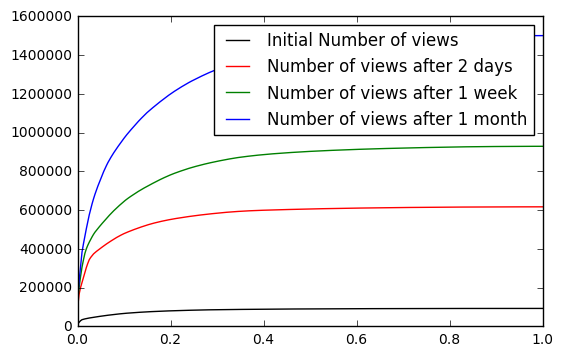

In [26]:
plt.plot(t,niviewslstcpy,'k', label='Initial Number of views')
plt.plot(t,n2viewslstcpy,'r', label='Number of views after 2 days')
plt.plot(t,n3viewslstcpy,'g', label='Number of views after 1 week')
plt.plot(t,n4viewslstcpy,'b', label='Number of views after 1 month')
plt.legend(loc='upper right')
#plt.ylim(0, 500000)
plt.show()

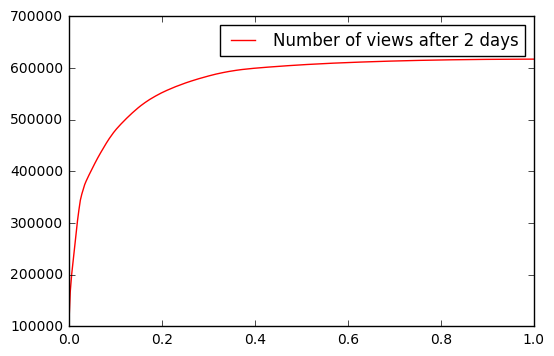

In [27]:
#plt.plot(t,niviewslstcpy,'r', label='Initial Number of views')
plt.plot(t,n2viewslstcpy,'r', label='Number of views after 2 days')
#plt.plot(t,n3viewslstcpy,'r', label='Number of views after 1 week')
#plt.plot(t,n4viewslstcpy,'r', label='Number of views after 1 month')
plt.legend(loc='upper right')
#plt.ylim(0, 500000)
plt.show()

In [28]:
print(niviewslstcpy)

[12030, 21560, 29619, 34908, 37193, 38927, 40539, 42074, 43529, 44772, 45974, 47166, 48330, 49492, 50611, 51729, 52842, 53940, 54978, 55962, 56940, 57884, 58820, 59749, 60613, 61475, 62333, 63178, 64017, 64843, 65625, 66351, 67061, 67730, 68325, 68910, 69485, 70059, 70611, 71136, 71657, 72149, 72637, 73121, 73595, 74037, 74478, 74904, 75306, 75698, 76086, 76447, 76804, 77158, 77512, 77860, 78208, 78533, 78832, 79129, 79410, 79691, 79971, 80236, 80498, 80745, 80986, 81225, 81461, 81694, 81913, 82129, 82342, 82555, 82767, 82979, 83190, 83399, 83606, 83812, 84017, 84214, 84403, 84592, 84768, 84941, 85100, 85246, 85391, 85528, 85660, 85787, 85905, 86021, 86137, 86252, 86365, 86476, 86579, 86681, 86783, 86877, 86971, 87062, 87151, 87237, 87323, 87409, 87494, 87578, 87662, 87740, 87818, 87895, 87971, 88045, 88118, 88191, 88263, 88333, 88403, 88470, 88537, 88602, 88666, 88730, 88794, 88857, 88919, 88981, 89041, 89100, 89159, 89217, 89275, 89333, 89391, 89446, 89499, 89552, 89604, 89655, 89706

In [29]:
print(n2viewslstcpy)

[101091, 167150, 201092, 227051, 253010, 278969, 304103, 325547, 344439, 356088, 365373, 374578, 381283, 387395, 393161, 398817, 404457, 409971, 415446, 420865, 426038, 431116, 435995, 440801, 445578, 450324, 454855, 459332, 463569, 467552, 471450, 475321, 478859, 482170, 485321, 488396, 491415, 494314, 497200, 500024, 502799, 505509, 508171, 510776, 513377, 515855, 518305, 520745, 523122, 525422, 527599, 529699, 531703, 533707, 535599, 537472, 539281, 540956, 542621, 544269, 545847, 547396, 548886, 550375, 551803, 553165, 554510, 555806, 557063, 558267, 559468, 560664, 561860, 563028, 564153, 565218, 566277, 567327, 568374, 569411, 570422, 571425, 572412, 573328, 574242, 575146, 576043, 576939, 577783, 578625, 579462, 580271, 581073, 581858, 582636, 583408, 584175, 584938, 585685, 586427, 587154, 587828, 588473, 589107, 589729, 590313, 590891, 591454, 592015, 592573, 593067, 593552, 594032, 594487, 594929, 595363, 595780, 596194, 596560, 596922, 597276, 597591, 597901, 598205, 598508,

In [30]:
sumi = 0
sumi = sum(niviewslstcpy)
sumi

27379898

In [31]:
niviewslstcpyf = list()
tsum = 0
for i in range(len(niviewslstcpy)):
    tsum += niviewslstcpy[i]
    temp = float(tsum)/sumi
    niviewslstcpyf.append(temp)
print(niviewslstcpyf)

[0.00043937344105518582, 0.0012268124592721274, 0.00230859150753593, 0.0035835414726526739, 0.0049419468253680127, 0.0063636833124798347, 0.0078442951102301404, 0.0093809699364110124, 0.01097078593937786, 0.012606000212272522, 0.014285115306127145, 0.016007765989486156, 0.017772929614273947, 0.019580533134199406, 0.021429006054003562, 0.023318311850540861, 0.025248267908083516, 0.027218326379448161, 0.029226295875901365, 0.031270204147583018, 0.033349832055619782, 0.035463937813062708, 0.03761222923474733, 0.039794450658654758, 0.042008228080323749, 0.044253488453463191, 0.046530085685490864, 0.04883754497551452, 0.051175647184660805, 0.053543917512037478, 0.055940748939240025, 0.058364096170117216, 0.060813374834340142, 0.063287087482940957, 0.065782531403148395, 0.068299341363506905, 0.070837152132560907, 0.073395927187164825, 0.075974863018116429, 0.078572973500485643, 0.081190112541690257, 0.083825220970509096, 0.086478152694359933, 0.08914876162066053, 0.09183668251795532, 0.09454

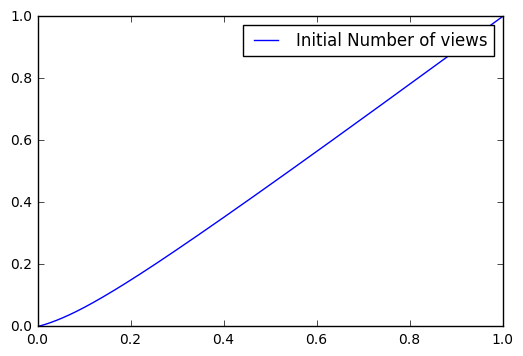

In [32]:
plt.plot(t,niviewslstcpyf,'b', label='Initial Number of views')
plt.legend(loc='upper right')
#plt.ylim(0, 500000)
plt.show()

In [33]:
niviewslstcpyf2 = list()
tsum = 0
length = len(niviewslstcpy)
sumi = length*(length + 1)/float(2)
for i in range(len(niviewslstcpy)):
    tsum += i + 1
    temp = float(tsum)/sumi
    niviewslstcpyf2.append(temp)
print(niviewslstcpyf2)

[1.9110958223445322e-05, 5.733287467033597e-05, 0.00011466574934067194, 0.00019110958223445324, 0.00028666437335167987, 0.0004013301226923518, 0.0005351068302564691, 0.0006879944960440316, 0.0008599931200550396, 0.0010511027022894928, 0.0012613232427473914, 0.0014906547414287351, 0.0017390971983335245, 0.002006650613461759, 0.002293314986813439, 0.002599090318388564, 0.0029239766081871343, 0.0032679738562091504, 0.0036310820624546117, 0.004013301226923518, 0.00441463134961587, 0.004835072430531667, 0.005274624469670909, 0.005733287467033597, 0.00621106142261973, 0.006707946336429308, 0.007223942208462332, 0.007759049038718801, 0.008313266827198715, 0.008886595573902076, 0.00947903527882888, 0.010090585941979131, 0.010721247563352826, 0.011371020142949967, 0.012039903680770554, 0.012727898176814585, 0.013435003631082063, 0.014161220043572984, 0.014906547414287352, 0.015670985743225164, 0.016454535030386422, 0.017257195275771128, 0.018078966479379278, 0.01891984864121087, 0.0197798417612

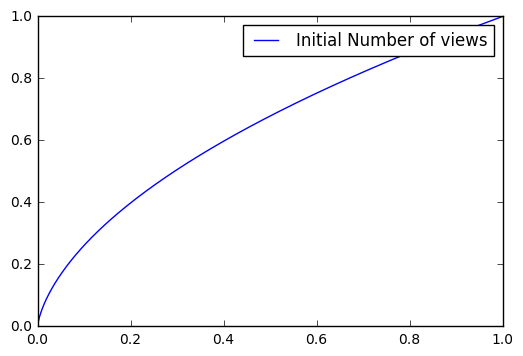

In [34]:
plt.plot(niviewslstcpyf2,niviewslstcpyf,'b', label='Initial Number of views')
plt.legend(loc='upper right')
#plt.ylim(0, 500000)
plt.show()

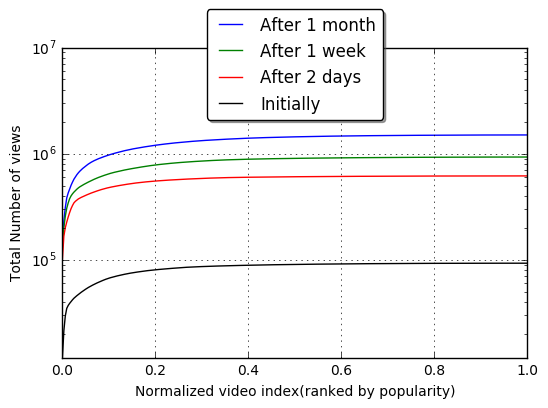

In [35]:
plt.plot(t,n4viewslstcpy,'b', label='After 1 month')
plt.plot(t,n3viewslstcpy,'g', label='After 1 week')
plt.plot(t,n2viewslstcpy,'r', label='After 2 days')
plt.plot(t,niviewslstcpy,'k', label='Initially')
#plt.legend(loc='upper right')
plt.xlabel('Normalized video index(ranked by popularity)', fontsize=10)
plt.ylabel('Total Number of views', fontsize=10)
plt.yscale('log')
plt.ylim(0, 10000000)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=1, fancybox=True, shadow=True)
plt.grid(True)

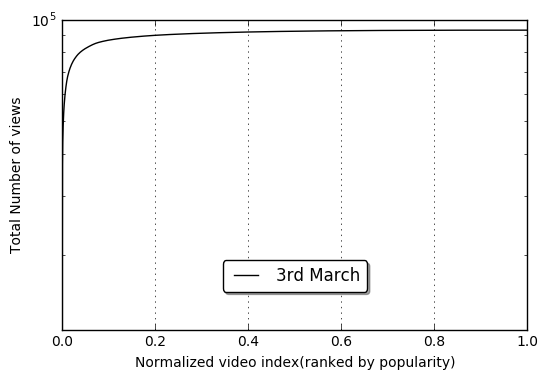

In [36]:
plt.plot(niviewslstcpyf2,niviewslstcpy,'k', label='3rd March')
#plt.legend(loc='upper right')
plt.xlabel('Normalized video index(ranked by popularity)', fontsize=10)
plt.ylabel('Total Number of views', fontsize=10)
plt.yscale('log')
plt.ylim(0, 100000)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 0.25), ncol=1, fancybox=True, shadow=True)
plt.grid(True)

## Feature Scaling

In [37]:
max_, min_ = float(max(niviewslstcpy)), float(min(niviewslstcpy))
niviewslstcpyf3 = [(i - min_)/(max_ - min_) for i in niviewslstcpy]

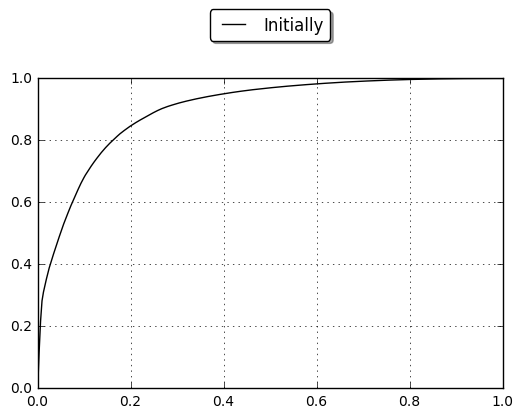

In [38]:
plt.plot(t,niviewslstcpyf3,'k', label='Initially')
#plt.legend(loc='upper right')
#plt.yscale('log')
#plt.xscale('log')
plt.ylim(0.0, 1.0)
#plt.lim(0.0, 1.0)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=1, fancybox=True, shadow=True)
plt.grid(True)

In [39]:
max_, min_ = float(max(n2viewslstcpy)), float(min(n2viewslstcpy))
n2viewslstcpyf3 = [(i - min_)/(max_ - min_) for i in n2viewslstcpy]

In [40]:
max_, min_ = float(max(n3viewslstcpy)), float(min(n3viewslstcpy))
n3viewslstcpyf3 = [(i - min_)/(max_ - min_) for i in n3viewslstcpy]

In [41]:
max_, min_ = float(max(n4viewslstcpy)), float(min(n4viewslstcpy))
n4viewslstcpyf3 = [(i - min_)/(max_ - min_) for i in n4viewslstcpy]

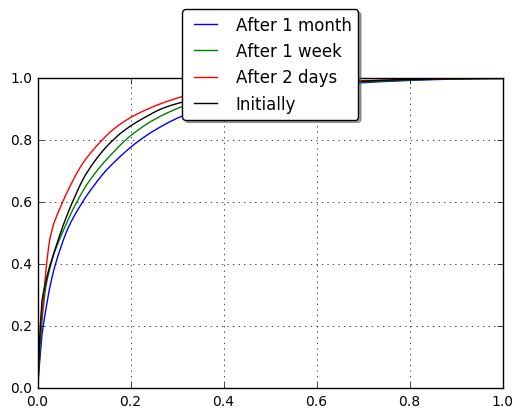

In [42]:
#https://en.wikipedia.org/wiki/Feature_scaling
plt.plot(t,n4viewslstcpyf3,'b', label='After 1 month')
plt.plot(t,n3viewslstcpyf3,'g', label='After 1 week')
plt.plot(t,n2viewslstcpyf3,'r', label='After 2 days')
plt.plot(t,niviewslstcpyf3,'k', label='Initially')
#plt.legend(loc='upper right')
#plt.yscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.25), ncol=1, fancybox=True, shadow=True)
plt.grid(True)

In [43]:
nratingslsttemp = [(index,row['n4ratings']) for index, row in dfn4views.iterrows()]
ncommentslsttemp = [(index,row['n4comments']) for index, row in dfn4views.iterrows()]

In [44]:
#print(nratingslsttemp)

In [45]:
nratingslst = [b for a,b in nratingslsttemp]
ncommentslst = [b for a,b in ncommentslsttemp]

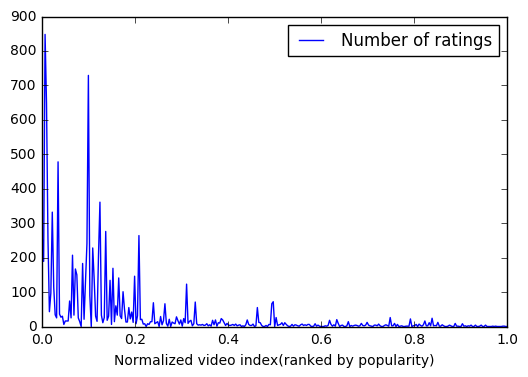

In [46]:
plt.plot(t,nratingslst,'b', label='Number of ratings')
#plt.plot(t,ncommentslst,'g', label='Number of comments')
plt.legend(loc='upper right')
plt.xlabel('Normalized video index(ranked by popularity)', fontsize=10)
#plt.ylim(0, 6000)
plt.show()

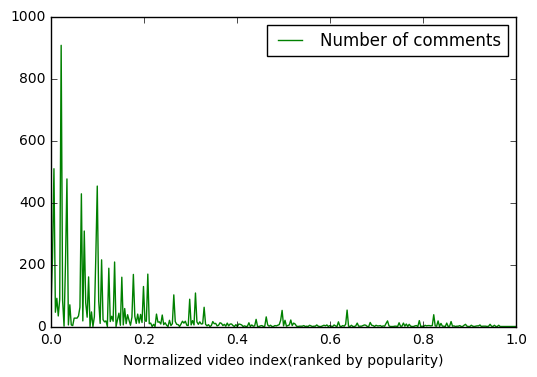

In [47]:
#plt.plot(t,nratingslst,'b', label='Number of ratings')
plt.plot(t,ncommentslst,'g', label='Number of comments')
plt.legend(loc='upper right')
plt.xlabel('Normalized video index(ranked by popularity)', fontsize=10)
#plt.ylim(0, 6000)
plt.show()

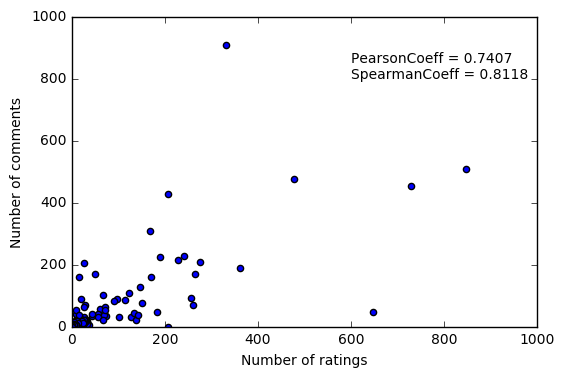

In [55]:
#import matplotlib.transforms as ax
#N = 50
#colors = np.random.rand(N)
#area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radiuses
#import matplotlib.pyplot as plt
#import matplotlib.patches as patches
#fig = plt.figure()
#left, width = .25, .5
#bottom, height = .25, .5
#right = left + width
#top = bottom + height

#p = patches.Rectangle(
#    (left, bottom), width, height,
#    fill=False, transform=ax.transAxes, clip_on=False
#    )
#ax.add_patch(p)
#ax = plt.add_axes([0,0,1,1])
plt.xlim(0, 1000)
plt.ylim(0, 1000)
plt.scatter(nratingslst, ncommentslst)
plt.xlabel('Number of ratings', fontsize=10)
plt.ylabel('Number of comments', fontsize=10)
plt.text(600, 800, 'PearsonCoeff = 0.7407 \nSpearmanCoeff = 0.8118')
#ax.text(0.1, 0.9,'matplotlib', ha='center', va='center',transform = ax.transAxes)
#ax.text(right, top, 'right top',        horizontalalignment='right',        verticalalignment='top',        transform=ax.transAxes)
#ax.set_axis_off()
plt.show()

In [100]:
from scipy.stats.stats import pearsonr
pearsonr(nratingslst, ncommentslst)

(0.74071615631562238, 2.1154202467010515e-57)

In [101]:
from scipy.stats.stats import spearmanr
spearmanr(nratingslst, ncommentslst)

SpearmanrResult(correlation=0.81185219699363875, pvalue=5.2966046595522586e-77)

In [1]:
import numpy as np
a = np.arange(1,1001)

In [2]:
p1 = np.random.choice(a,size=100,replace=0)
p2 = np.setdiff1d(a,p1)

In [4]:
#a

In [5]:
p1

array([113, 321,  41, 655, 241, 902, 651, 216, 565, 431, 183, 772, 638,
       170, 664, 861, 159, 870, 517,  55, 460, 503, 116, 829, 885, 505,
       740, 908, 400, 722, 521, 501, 386, 582,  56, 377, 263, 262, 173,
       430,  24, 954, 878, 759, 856, 802, 124, 688, 912, 574, 775, 202,
        28,   8, 247, 391, 968, 523, 636, 859, 133, 718, 684, 704, 768,
       535, 375, 187, 678, 249, 938, 305, 440, 976, 414, 393, 244, 486,
       331, 403, 701, 423, 666, 946, 937,  85,  33, 407, 901, 801, 490,
       149, 959, 910, 409, 563, 619, 741, 145, 510])

In [7]:
#p2

In [8]:
p1_idx = np.random.randint(0,p1.size,(8000))
p2_idx = np.random.randint(0,p2.size,(2000))

In [9]:
p1_idx

array([72, 50, 10, ..., 58, 92, 72])

In [10]:
p2_idx

array([117, 226, 124, ..., 144, 169, 273])

In [11]:
max(p1_idx)

99

In [12]:
max(p2_idx)

899

In [13]:
out = np.random.permutation(np.hstack((p1[p1_idx], p2[p2_idx])))

In [14]:
out

array([840, 457, 688, ..., 381, 876, 901])

In [15]:
len(out)

10000

In [16]:
lst = list()

In [17]:
lst = list(out)

In [20]:
#lst

In [19]:
max(lst)

1000